# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?APPID=" + weather_api_key + "&units=imperial&q="

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
print(f"DATA RETREIVAL BEGINNING\nNUMBER OF RECORDS: {len(cities)}\n---------------------------")
count = 0
with open(output_data_file, 'w') as csvfile:
    # Initialize csv.writer
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerow(['City', 'Lat', 'Long', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])

    # Get the data & write it
    for city in cities:
        count += 1
        data = requests.get(base_url + city).json()
        try:
            print(f"Processing city {count} | {data['name']}")
            csvwriter.writerow([
                data['name'],
                data['coord']['lat'],
                data['coord']['lon'],
                data['main']['temp_max'],
                data['main']['humidity'],
                data['clouds']['all'],
                data['wind']['speed'],
                data['sys']['country'],
                data['dt']
            ])
        except KeyError:
            # City wasn't found, skip it
            print(f"Processing city {count} | {city} not found.")

ar del Plata
Processing city 3 | Severo-Kuril'sk
Processing city 4 | Sinnamary
Processing city 5 | Busselton
Processing city 6 | Provideniya
Processing city 7 | Ushuaia
Processing city 8 | Gravdal
Processing city 9 | Carnarvon
Processing city 10 | Hilo
Processing city 11 | Sakaiminato
Processing city 12 | Norman Wells
Processing city 13 | Mataura
Processing city 14 | Naze
Processing city 15 | Mehamn
Processing city 16 | Beringovskiy
Processing city 17 | Punta Arenas
Processing city 18 | Ruwi
Processing city 19 | Rikitea
Processing city 20 | Mergen
Processing city 21 | Ilulissat
Processing city 22 | Cape Town
Processing city 23 | São José da Coroa Grande
Processing city 24 | Port Elizabeth
Processing city 25 | Bethel
Processing city 26 | Murchison
Processing city 27 | Hambantota
Processing city 28 | Saint George
Processing city 29 | Sittwe
Processing city 30 | Kaitangata
Processing city 31 | tidore not found.
Processing city 32 | Bluff
Processing city 33 | Brae
Processing city 34 | Hoba

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [54]:
# Import CSV as DataFrame
weather_data = pd.read_csv(output_data_file)
weather_data.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.70,30.79,42.01,86,90,11.18,RU,1604348317
1,Mar del Plata,-38.00,-57.56,66.20,55,90,12.75,AR,1604348317
2,Severo-Kuril'sk,50.68,156.12,43.30,82,100,23.13,RU,1604348317
3,Sinnamary,5.38,-52.95,78.62,86,100,14.56,GF,1604348317
4,Busselton,-33.65,115.33,55.99,84,78,11.23,AU,1604348318


In [55]:
# Check to see if we have a decently wide range of cities around the world
weather_data.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,22.382088,22.087789,57.177737,71.822807,54.675439,8.620825,1.604348e+09
std,33.080085,88.730329,23.868438,21.441755,39.307739,6.396428,8.521095e+01
min,-54.800000,-179.170000,-17.610000,8.000000,0.000000,0.430000,1.604348e+09
25%,-3.040000,-53.775000,42.187500,60.000000,15.000000,4.012500,1.604348e+09
50%,26.860000,25.535000,64.400000,77.000000,70.500000,6.930000,1.604348e+09
75%,51.377500,99.612500,75.982500,88.000000,94.000000,11.410000,1.604348e+09
max,78.220000,179.320000,99.000000,100.000000,100.000000,43.620000,1.604349e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [74]:
# There are no humidity outliers
weather_data.loc[weather_data['Humidity'] > 100]
# Convert the date to a readable format for use in the charts
weather_data['Date'] = pd.to_datetime(weather_data['Date'],unit='s')
currentDate = weather_data.iloc[0,8].date()
weather_data.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.70,30.79,42.01,86,90,11.18,RU,2020-11-02 20:18:37
1,Mar del Plata,-38.00,-57.56,66.20,55,90,12.75,AR,2020-11-02 20:18:37
2,Severo-Kuril'sk,50.68,156.12,43.30,82,100,23.13,RU,2020-11-02 20:18:37
3,Sinnamary,5.38,-52.95,78.62,86,100,14.56,GF,2020-11-02 20:18:37
4,Busselton,-33.65,115.33,55.99,84,78,11.23,AU,2020-11-02 20:18:38


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

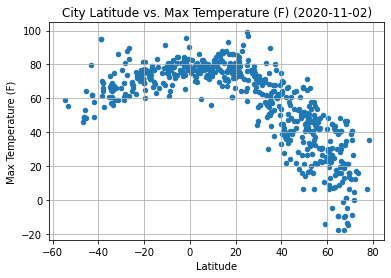

Added scatter plot which confirms temps near the equator (0 Lat) are warmer than those farther away. Seasons are reversed in N/S Hemispheres, which is also reflected.


In [75]:
weather_data.plot(kind='scatter',x='Lat',y='Max Temp', grid=True)
plt.title(f"City Latitude vs. Max Temperature (F) ({currentDate})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("output_data/lat_vs_temp.png")
plt.show()
print("Added scatter plot which confirms temps near the equator (0 Lat) are warmer than those farther away. Seasons are reversed in N/S Hemispheres, which is also reflected.")

## Latitude vs. Humidity Plot

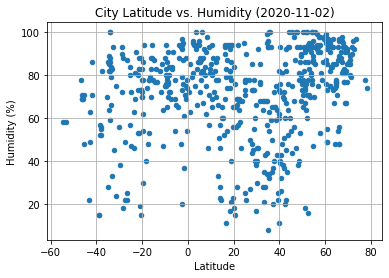

Added scatter plot which shows humidity does not have a strong relationship with distance from the equator.


In [76]:
weather_data.plot(kind='scatter',x='Lat',y='Humidity', grid=True)
plt.title(f"City Latitude vs. Humidity ({currentDate})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("output_data/lat_vs_hum.png")
plt.show()
print("Added scatter plot which shows humidity does not have a strong relationship with distance from the equator.")

## Latitude vs. Cloudiness Plot

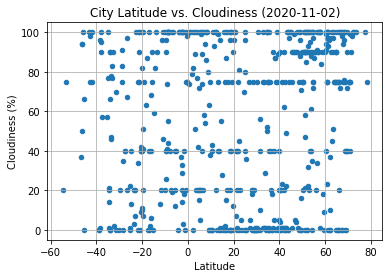

Added scatter plot which shows cloudiness does not have a strong relationship with distance from the equator.


In [77]:
weather_data.plot(kind='scatter',x='Lat',y='Cloudiness', grid=True)
plt.title(f"City Latitude vs. Cloudiness ({currentDate})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data/lat_vs_cloud.png")
plt.show()
print("Added scatter plot which shows cloudiness does not have a strong relationship with distance from the equator.")

## Latitude vs. Wind Speed Plot

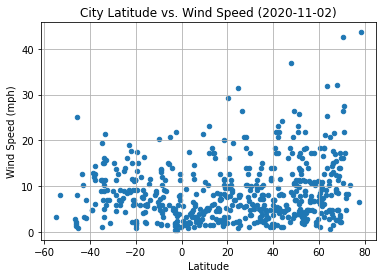

Added scatter plot which shows wind speed does not have a strong relationship with distance from the equator. It looks like there might be higher winds in the northern hemisphere in general, but that could be related to the season.


In [78]:
weather_data.plot(kind='scatter',x='Lat',y='Wind Speed', grid=True)
plt.title(f"City Latitude vs. Wind Speed ({currentDate})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data/lat_vs_wind.png")
plt.show()
print("Added scatter plot which shows wind speed does not have a strong relationship with distance from the equator. It looks like there might be higher winds in the northern hemisphere in general, but that could be related to the season.")

## Linear Regression

In [86]:
# Split the data into northern & southern hemispheres
northern = weather_data.loc[weather_data["Lat"] >= 0]
southern = weather_data.loc[weather_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8409169876709021


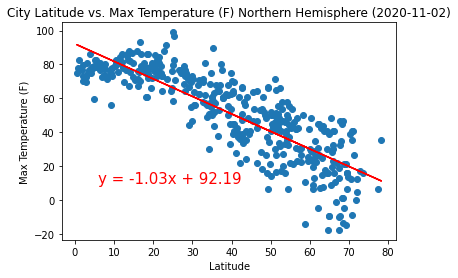

assess


In [87]:
# Scatter plot values
x_values = northern['Lat']
y_values = northern['Max Temp']
# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Make the plot nice
plt.title(f"City Latitude vs. Max Temperature (F) Northern Hemisphere ({currentDate})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("output_data/north_lat_vs_temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6156346702354903


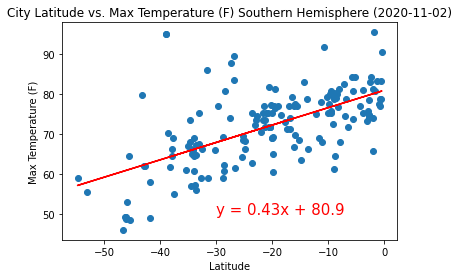

As expected, there is a strong relationship between latitude and temperature as given by the r values. It is particularly noticable in the Northern Hemisphere where there are more data points.


In [115]:
# Scatter plot values
x_values = southern['Lat']
y_values = southern['Max Temp']
# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
# Make the plot nice
plt.title(f"City Latitude vs. Max Temperature (F) Southern Hemisphere ({currentDate})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("output_data/south_lat_vs_temp.png")
plt.show()
print("As expected, there is a strong relationship between latitude and temperature as given by the r values. It is particularly noticable in the Northern Hemisphere where there are more data points.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.20589914958044733


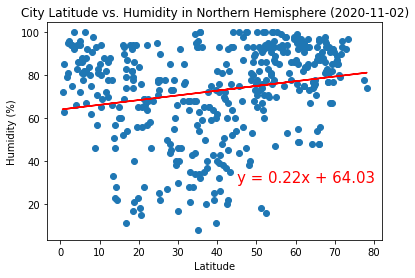

In [100]:
# Scatter plot values
x_values = northern['Lat']
y_values = northern['Humidity']
# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
# Make the plot nice
plt.title(f"City Latitude vs. Humidity in Northern Hemisphere ({currentDate})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("output_data/north_lat_vs_hum.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.24818895805179073


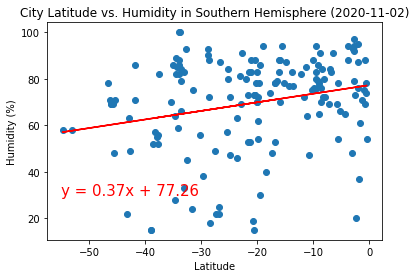

In the southern hemisphere there seems to be a stronger relationship between humidity and closeness to the equator (closer = higher) , but not in the northern. In both cases, the correlation is weak.


In [116]:
# Scatter plot values
x_values = southern['Lat']
y_values = southern['Humidity']
# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
# Make the plot nice
plt.title(f"City Latitude vs. Humidity in Southern Hemisphere ({currentDate})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("output_data/south_lat_vs_hum.png")
plt.show()
print("In the southern hemisphere there seems to be a stronger relationship between humidity and closeness to the equator (closer = higher) , but not in the northern. In both cases, the correlation is weak.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19658829258055682


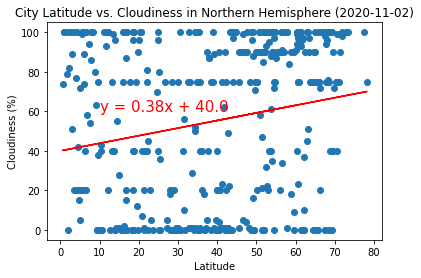

In [110]:
# Scatter plot values
x_values = northern['Lat']
y_values = northern['Cloudiness']
# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
# Make the plot nice
plt.title(f"City Latitude vs. Cloudiness in Northern Hemisphere ({currentDate})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data/north_lat_vs_cloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0478591173458902


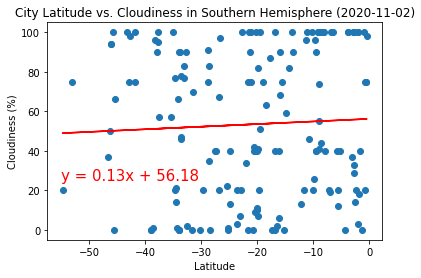

Cloudiness appears to have no relationship to distance from the equator.


In [117]:
# Scatter plot values
x_values = southern['Lat']
y_values = southern['Cloudiness']
# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
# Make the plot nice
plt.title(f"City Latitude vs. Cloudiness in Southern Hemisphere ({currentDate})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data/south_lat_vs_cloud.png")
plt.show()
print("Cloudiness appears to have no relationship to distance from the equator.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.24896228972671444


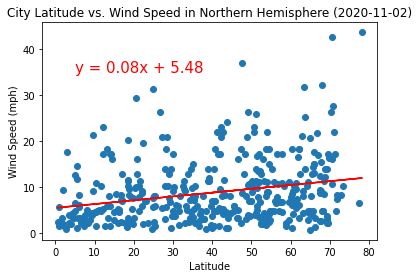

In [112]:
# Scatter plot values
x_values = northern['Lat']
y_values = northern['Wind Speed']
# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")
# Make the plot nice
plt.title(f"City Latitude vs. Wind Speed in Northern Hemisphere ({currentDate})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data/north_lat_vs_wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.12054090495416156


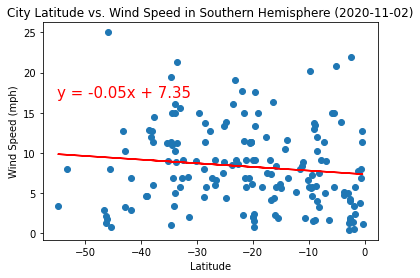

In [114]:
# Scatter plot values
x_values = southern['Lat']
y_values = southern['Wind Speed']
# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,17),fontsize=15,color="red")
# Make the plot nice
plt.title(f"City Latitude vs. Wind Speed in Southern Hemisphere ({currentDate})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data/south_lat_vs_wind.png")
plt.show()
print("Again, wind speed seems to be uncorrelated with distance from the equator. It is interesting that the northern hemisphere sees much higher wind speeds. If this was done during hurricane/tropical storm season, we might see different results.")